<a href="https://colab.research.google.com/github/BarbaraKatsarou/Homework-Data-Engineering/blob/main/Homework2_Katsarou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Engineering
**Homework 2**

**Purpose of the Project** : The purpose of this project is to analyze the financial aid provided to U.S. businesses during the COVID-19 pandemic through the Paycheck Protection Program (PPP). We assume that we are analysts of U.S. governemnt bureu, the aim is to create a comprehensive analysis that cover various georgaphic levels (country, state, etc.) and offer insights into the demographics and industries that benefited from the program.

author : Katsarou Varvara-Grigoria\
email  : banakatsarou@gmail.com

# **Implementation**

Import libraries

In [ ]:
#import the libraries
import pandas as pd
import requests
import numpy as np
import os

Create directories to organize project data and code

In [ ]:
#Directory to store raw data files
os.makedirs("CovidRecovery/RawData", exist_ok=True)
#Directory to store output files
os.makedirs("CovidRecovery/output", exist_ok=True)
#Directory to store code files
os.makedirs("CovidRecovery/code", exist_ok=True)
#Directory to store CSV file
os.makedirs("CovidRecovey/CSV", exist_ok=True)

# **Load data**

We will use the PPP data from the US Small Business Administration, the job postings from the Opportunity Insights, and the latest population estimates of US Counties from US Cencus Bureau.

In [ ]:
#URLs of PPP datasets
urls =[ 'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/738e639c-1fbf-4e16-beb0-a223831011e8/download/public_150k_plus_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a7fa66f4-fd2e-433c-8ef9-59780ef60ae5/download/public_up_to_150k_1_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7d2308a8-0ac1-48a8-b21b-f9eb373ac417/download/public_up_to_150k_2_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5158aae1-066d-4d01-a226-e44ecc9bdda7/download/public_up_to_150k_3_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/d888bab1-da5b-46f2-bed2-a052d48af246/download/public_up_to_150k_4_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ee12d751-2bb4-4343-8330-32311ae4e7c7/download/public_up_to_150k_5_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/27b874d9-a059-4296-bb74-374294c48616/download/public_up_to_150k_6_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/434efae0-016a-48da-92dc-c6f113d827c1/download/public_up_to_150k_7_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4fc8e993-c3b9-4eb2-b9bb-dfbde9b1fb6f/download/public_up_to_150k_8_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7f9c6867-2b55-472e-a4f3-fd0f5f27f790/download/public_up_to_150k_9_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a8f2c8b2-facb-4e97-ad5f-7c8736c8b4b6/download/public_up_to_150k_10_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv']

In [ ]:
# Loop through each URL, enumerate for indexing starting from 1
for i, url in enumerate(urls, start=1):
    # Create a filename for each dataset
    filename = f'ppp_dataset{i}.csv'
    # Define the file path where the dataset will be saved
    filepath = os.path.join('CovidRecovery', 'RawData', filename)

    # Make a GET request to the URL to download the dataset
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file in write-binary mode and write the content
        with open(filepath, 'wb') as f:
            f.write(response.content)
        # Print success message
        print(f'Dataset {i} downloaded and saved successfully.')
    else:
        # Print error message if the download failed
        print(f'Failed to download dataset {i}. Status code: {response.status_code}')

path = 'CovidRecovery/RawData/data.csv'

Dataset 1 downloaded and saved successfully.
Dataset 2 downloaded and saved successfully.
Dataset 3 downloaded and saved successfully.
Dataset 4 downloaded and saved successfully.
Dataset 5 downloaded and saved successfully.
Dataset 6 downloaded and saved successfully.
Dataset 7 downloaded and saved successfully.
Dataset 8 downloaded and saved successfully.
Dataset 9 downloaded and saved successfully.
Dataset 10 downloaded and saved successfully.
Dataset 11 downloaded and saved successfully.
Dataset 12 downloaded and saved successfully.
Dataset 13 downloaded and saved successfully.


In [ ]:
# Define the columns to keep
keep_columns = [
    'DateApproved','BorrowerState', 'BorrowerCity', 'InitialApprovalAmount','ServicingLenderState','JobsReported',
    'CurrentApprovalAmount','BusinessType', 'Race', 'Ethnicity', 'Gender', 'Veteran']

# Define the data types for each column
dtype_dict = {
    'DateApproved':'string',
    'BorrowerState': 'string',
    'BorroweCity' : 'string',
    'InitialApprovalAmount': 'float64',
    'CurrentApprovalAmount': 'float64',
    'ServicingLenderState': 'string',
    'JobsReported': 'float64',
    'BusinessType': 'string',
    'Race': 'string',
    'Ethnicity': 'string',
    'Gender': 'string',
    'Veteran': 'string',
}
# Load the dataset with specified data types
ppp_data = {}
for i in range (1,13):
  ppp_data[i] = pd.read_csv('CovidRecovery/RawData/'f'ppp_dataset{i}.csv', usecols=keep_columns, dtype=dtype_dict)
  ppp_data[i]['DateApproved'] = pd.to_datetime(ppp_data[i]['DateApproved'], format='%m/%d/%Y')


In [ ]:
# List to store sampled DataFrames
sampled_dfs = []

# Load the datasets with specified data types and sample 10% from each
for i in range(1, 14):
    filepath = os.path.join('CovidRecovery', 'RawData', f'ppp_dataset{i}.csv')
    df = pd.read_csv(filepath, usecols=keep_columns, dtype=dtype_dict)
    df['DateApproved'] = pd.to_datetime(df['DateApproved'], format='%m/%d/%Y')
    sampled_dfs.append(df.sample(frac=0.1, random_state=42))

# Concatenate all sampled DataFrames into one
combined_df = pd.concat(sampled_dfs, ignore_index=True)

# Check if any datasets were loaded and print the first few rows of the combined DataFrame
if not combined_df.empty:
    print(combined_df.head())
else:
    print("No datasets were loaded.")

  DateApproved BorrowerCity BorrowerState  InitialApprovalAmount  \
0   2021-04-08     Milltown            WI              1003600.0   
1   2020-04-07  KANSAS CITY            MO               423985.0   
2   2020-04-10     PEWAUKEE            WI              3771000.0   
3   2021-02-06  Garden City            NY               195445.0   
4   2020-04-15     TARENTUM            PA               237300.0   

   CurrentApprovalAmount ServicingLenderState  JobsReported        Race  \
0              1003600.0                   MN          90.0       White   
1               423985.0                   NE          42.0  Unanswered   
2              3771000.0                   IL         232.0  Unanswered   
3               195445.0                   OH          11.0       White   
4               237300.0                   OH          22.0       White   

                Ethnicity              BusinessType        Gender      Veteran  
0  Not Hispanic or Latino               Corporation    Male

Load job postings dataset from the Opportunity Insights

In [ ]:
# Define the URL
url = 'https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Job%20Postings%20-%20State%20-%20Weekly.csv'

# Define the filename and filepath
filename = f'job.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print(f'job  downloaded and saved successfully.')
else:
    print(f'Failed to download job. Status code: {response.status_code}')

job  downloaded and saved successfully.


In [ ]:
# Load the CSV file into a DataFrame
df_job = pd.read_csv(filepath).iloc[:, :4]
print(df_job.head())

   year  month  day_endofweek  statefips
0  2020      1             10          1
1  2020      1             10          2
2  2020      1             10          4
3  2020      1             10          5
4  2020      1             10          6


Load the the latest population dataset of US Counties from US Cencus Bureau.

In [ ]:
# Define the URL
url = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv'

# Define the filename and filepath
filename = f'Population_Estimates.csv'
filepath = os.path.join('CovidRecovery', 'RawData', filename)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as f:
        f.write(response.content)
    print('Population Estimates downloaded and saved successfully.')
else:
    print(f'Failed to download Population Estimates. Status code: {response.status_code}')


Population Estimates downloaded and saved successfully.


In [ ]:
# Load the CSV file into a DataFrame with specified encoding
df_population = pd.read_csv(filepath, encoding='latin1')
print(df_population.head())

   SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   ESTIMATESBASE2020  POPESTIMATE2020  POPESTIMATE2021  ...  RNATURALCHG2023  \
0            5024294          5031864          5050380  ...        -0.306805   
1              58809            58915            59203  ...         1.549122   
2             231768           233227           239439  ...        -0.435967   
3              25229            24969            24533  ...        -3.368165   
4              22301            22188            22359  ...        -2.280294   

   RINTERNATIONALMIG2021  RINTERNATIONALMIG2022  RINTERNATIONALMIG2023  \
0               0.

# **Clean Data**

In this section, we will check for missing values.

In [ ]:
# Check for missing values in the entire DataFrame and print the count
combined_df.isna().sum()
# Remove rows with any missing values
combined_df = combined_df.dropna()
# Print the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:\n", combined_df.head())


Cleaned DataFrame:
   DateApproved BorrowerCity BorrowerState  InitialApprovalAmount  \
0   2021-04-08     Milltown            WI              1003600.0   
1   2020-04-07  KANSAS CITY            MO               423985.0   
2   2020-04-10     PEWAUKEE            WI              3771000.0   
3   2021-02-06  Garden City            NY               195445.0   
4   2020-04-15     TARENTUM            PA               237300.0   

   CurrentApprovalAmount ServicingLenderState  JobsReported        Race  \
0              1003600.0                   MN          90.0       White   
1               423985.0                   NE          42.0  Unanswered   
2              3771000.0                   IL         232.0  Unanswered   
3               195445.0                   OH          11.0       White   
4               237300.0                   OH          22.0       White   

                Ethnicity              BusinessType        Gender      Veteran  
0  Not Hispanic or Latino             

In [ ]:
# Replace empty strings with NaN
combined_df.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
combined_df.isna().any().any()

False

In [ ]:
# Check for missing values in the entire DataFrame and print the count
df_job.isna().sum()
#no missing values

year             0
month            0
day_endofweek    0
statefips        0
dtype: int64

In [ ]:
# Replace empty strings with NaN
df_job.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
df_job.isna().any().any()

False

In [ ]:
# Check for missing values in the entire DataFrame and print the count
df_population.isna().sum()
#no missing values

SUMLEV              0
REGION              0
DIVISION            0
STATE               0
COUNTY              0
                   ..
RDOMESTICMIG2022    0
RDOMESTICMIG2023    0
RNETMIG2021         0
RNETMIG2022         0
RNETMIG2023         0
Length: 67, dtype: int64

In [ ]:
# Replace empty strings with NaN
df_population.replace("", pd.NA, inplace=True)
# Check if there are any NaN values in the entire DataFrame
df_population.isna().any().any()

False

# **Explanatory Analysis**

Through explanatory data analysis techniques, we aim to uncover meaningful patterns and disparities in aid distribution, empowering decision-makers with evidence-based interventions and allocate resources effectively

In [ ]:
# Total number of current approval loans
total_loans = combined_df['CurrentApprovalAmount'].count()
print(f'Current Approval Amount: {total_loans}')

Current Approval Amount: 1176600


In [ ]:
# Summary statistics for the PPP dataset
print("Summary statistics for the PPP dataset:")
print(combined_df.describe())

# Summary statistics for the df_job dataset
print("\nSummary statistics for the df_job dataset:")
print(df_job.describe())

# Summary statistics for the df_population dataset
print("\nSummary statistics for the df_population dataset:")
print(df_population.describe())


Summary statistics for the PPP dataset:
                        DateApproved  InitialApprovalAmount  \
count                        1176600           1.176600e+06   
mean   2020-10-31 05:10:08.750637824           6.811081e+04   
min              2020-04-03 00:00:00          -1.996590e+05   
25%              2020-05-01 00:00:00           9.500000e+03   
50%              2021-01-29 00:00:00           2.062000e+04   
75%              2021-03-31 00:00:00           3.930000e+04   
max              2021-06-30 00:00:00           1.000000e+07   
std                              NaN           2.607860e+05   

       CurrentApprovalAmount  JobsReported  
count           1.176600e+06  1.176600e+06  
mean            6.774718e+04  7.674202e+00  
min             4.000000e-02  0.000000e+00  
25%             9.465000e+03  1.000000e+00  
50%             2.060700e+04  1.000000e+00  
75%             3.910700e+04  6.000000e+00  
max             1.000000e+07  5.000000e+02  
std             2.580823e+05  2.

<ipython-input-35-1f7acb5073db>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars=sns.barplot(x='STNAME', y='POPESTIMATE2020', data=df_population, ci=None)


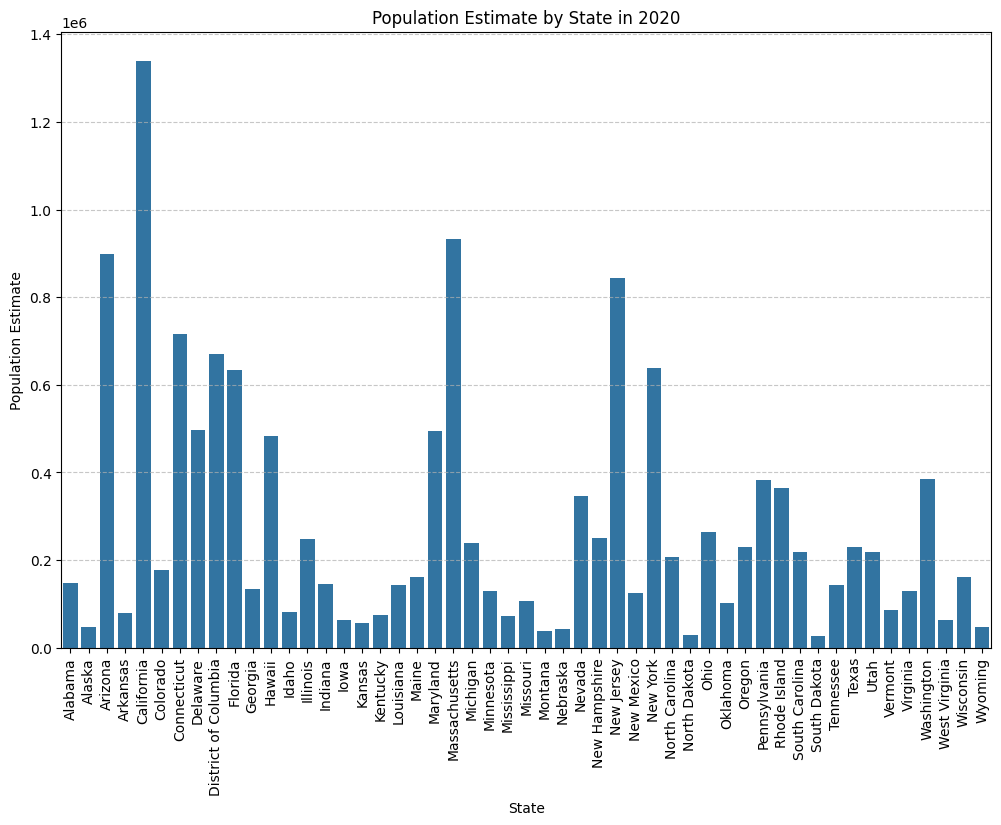

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choropleth map showing the distribution of loan amounts across states or counties
plt.figure(figsize=(12, 8))
bars=sns.barplot(x='STNAME', y='POPESTIMATE2020', data=df_population, ci=None)
plt.title('Population Estimate by State in 2020')
plt.xlabel('State')
plt.ylabel('Population Estimate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart titled "Population Estimate by State in 2020" displays the population estimates for each state in the United States for the year 2020. Each bar represents a state, with the height of the bar corresponding to the population estimate. The chart highlights significant population differences among the states, with some states like California and Texas having notably high population estimates, while others like Wyoming and Vermont have much lower estimates.

<ipython-input-36-148f72c0a069>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_states_loan_counts.index, y=top_states_loan_counts.values, palette=colors)


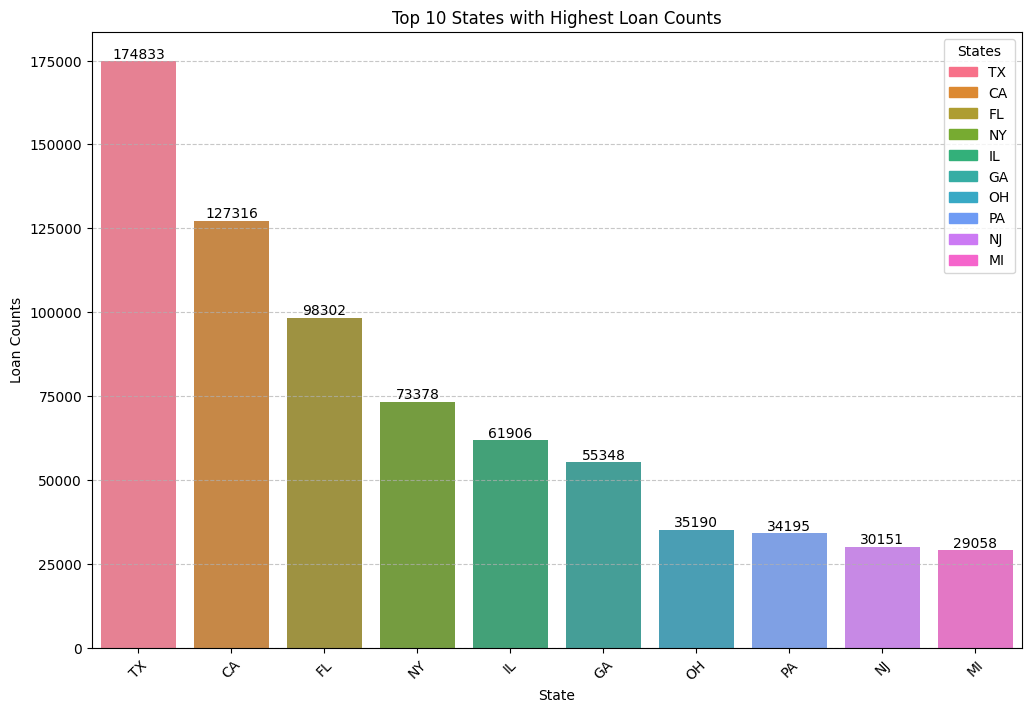

In [ ]:
# Group the DataFrame by 'BorrowerState' and count the number of loans in each state
state_loan_counts = combined_df['BorrowerState'].value_counts()

# Get the top 10 states with the highest loan counts
top_states_loan_counts = state_loan_counts.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(top_states_loan_counts))
# Create bar plot with different colors for each bar
bars = sns.barplot(x=top_states_loan_counts.index, y=top_states_loan_counts.values, palette=colors)

# Add labels to each bar
for bar, label in zip(bars.patches, top_states_loan_counts.index):
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')

# Create custom legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=state) for color, state in zip(colors, top_states_loan_counts.index)]

# Add the legend to the plot
plt.legend(handles=legend_handles, title='States')

plt.title('Top 10 States with Highest Loan Counts')
plt.xlabel('State')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart titled "Top 10 States with Highest Loan Counts" displays the number of loans distributed in the top 10 states. Texas (TX) has the highest loan count, with 174,833 loans.California (CA) follows with 127,316 loans.
Florida (FL) and New York (NY) have 98,302 and 73,378 loans, respectively.

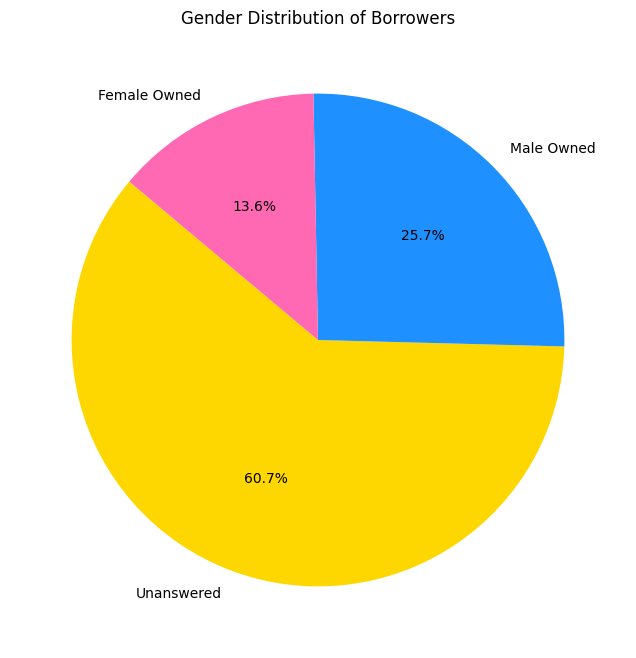

In [ ]:
# Calculate gender distribution
gender_distribution = combined_df['Gender'].value_counts()

# Define specific colors for each gender category
colors = {
    'Unanswered': '#FFD700',  # Yellow
    'Male Owned': '#1E90FF',  # Blue
    'Female Owned': '#FF69B4'  # Pink
}

# Get the color list for the pie chart
color_list = [colors[gender] for gender in gender_distribution.index]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, colors=color_list, autopct='%1.1f%%', startangle=140)

plt.title('Gender Distribution of Borrowers')
plt.show()

The chart visually highlights that the majority of the borrowers did not specify their gender (Unanswered), followed by male-owned businesses, and then female-owned businesses. Each segment is labeled with its respective percentage for clarity.

<ipython-input-38-f2264818ebf6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)


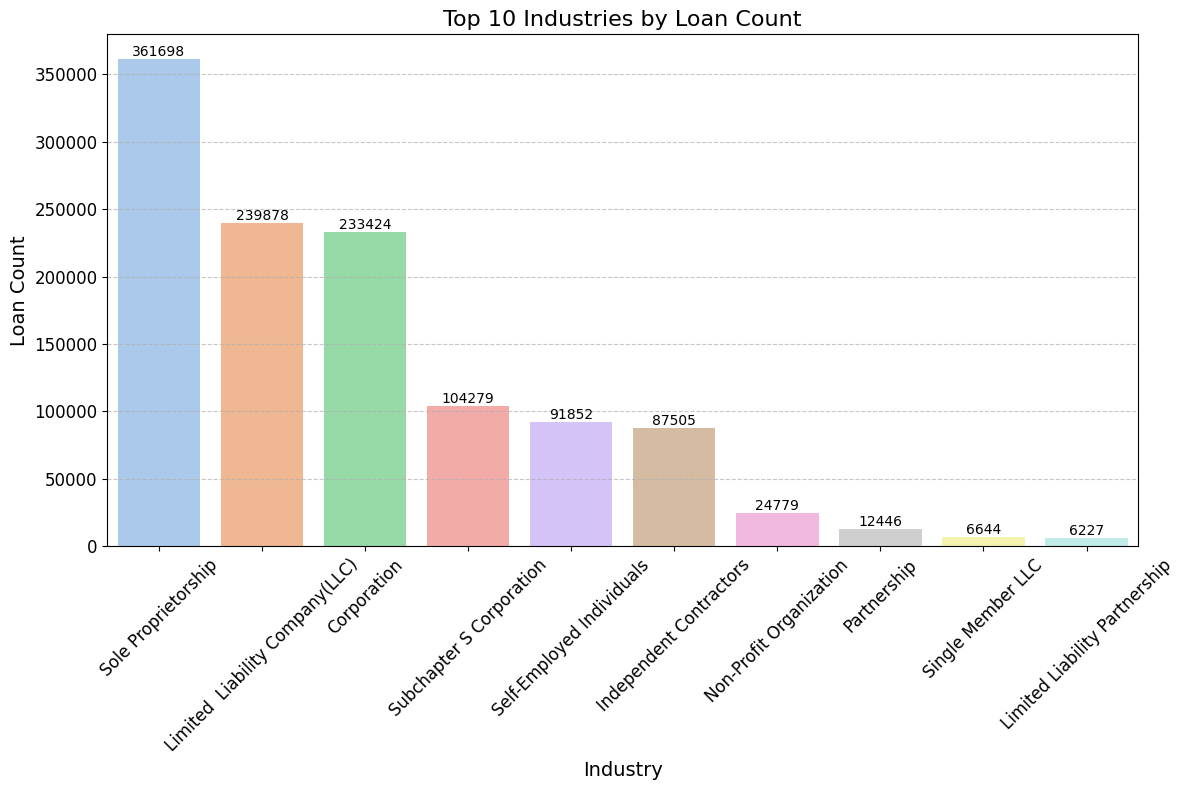

In [ ]:
# Calculate industry distribution
industry_counts = combined_df['BusinessType'].value_counts().head(10)

# Define a color palette
colors = sns.color_palette('pastel', len(industry_counts))

# Plotting
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors)

# Add labels to each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'{int(height)}',  # Format the number as an integer
        ha='center',
        va='bottom'
    )

# Customize the plot
plt.title('Top 10 Industries by Loan Count', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Loan Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Sole Proprietorship has the highest loan count, with 361,698 loans.
Limited Liability Company (LLC) follows with 239,878 loans.
Corporation has 233,424 loans, making it the third highest.
Subchapter S Corporation and Self-Employed Individuals have 104,279 and 91,852 loans respectively.
Other industries in descending order of loan counts are Independent Contractors (87,505), Non-Profit Organization (24,779), Partnership (12,446), Single Member LLC (6,644), and Limited Liability Partnership (6,227).

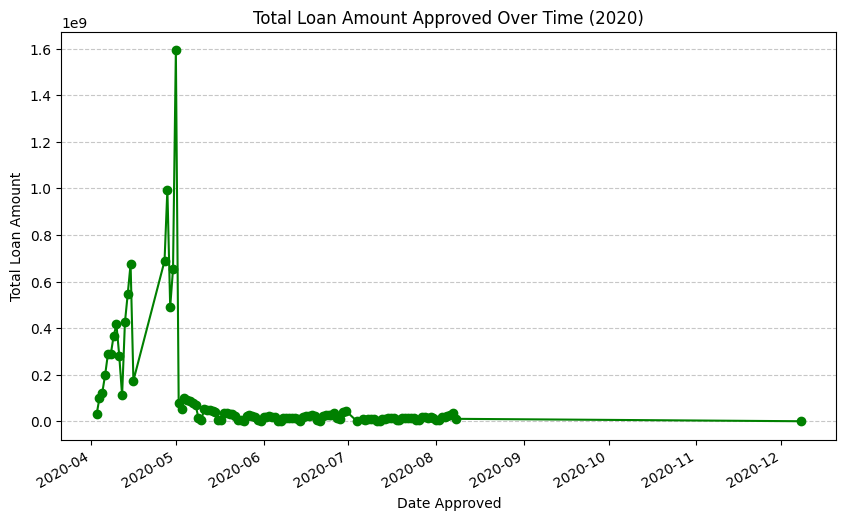

In [ ]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# Filter the data for the year 2020
df_2020 = df[(df['DateApproved'] >= '2020-01-01') & (df['DateApproved'] <= '2020-12-31')]

# Line Plot for total loan amount over time for the year 2020
plt.figure(figsize=(10, 6))
df_2020.groupby('DateApproved')['CurrentApprovalAmount'].sum().plot(kind='line', marker='o', color='green')
plt.title('Total Loan Amount Approved Over Time (2020)')
plt.xlabel('Date Approved')
plt.ylabel('Total Loan Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The line chart titled "Total Loan Amount Approved Over Time (2020)" shows the total loan amounts approved on different dates throughout the year 2020. The x-axis represents the dates, and the y-axis represents the total loan amount approved in billions. The chart highlights a high concentration of loan approvals during the early part of the year, especially around late April and early May, followed by a dramatic decline and stabilization in the loan amounts for the rest of the year.


<ipython-input-40-aab2de7f2cbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ethnicity', y='CurrentApprovalAmount', data=df_2020, palette='Set3')


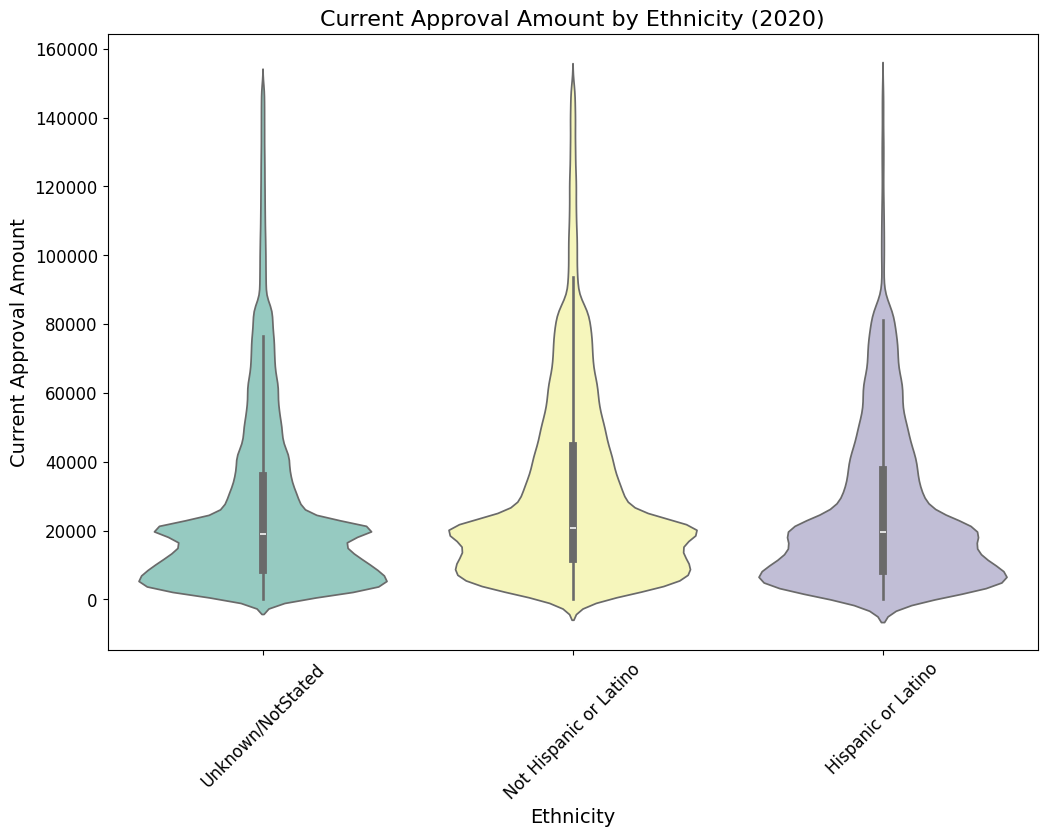

In [ ]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df_2020 = df[(df['DateApproved'] >= '2020-01-01') & (df['DateApproved'] <= '2020-12-31')]

# Violin Plot for Ethnicity vs. CurrentApprovalAmount with different colors
plt.figure(figsize=(12, 8))
sns.violinplot(x='Ethnicity', y='CurrentApprovalAmount', data=df_2020, palette='Set3')
plt.title('Current Approval Amount by Ethnicity (2020)', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Current Approval Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The violin plot titled "Current Approval Amount by Ethnicity (2020)" displays the distribution of loan approval amounts across different ethnicities for the year 2020.The median loan amounts (indicated by the white dot within the black bar) appear to be similar across all three categories. The overall shapes of the violins suggest that most loans are approved for lower amounts, with a smaller number of loans approved for significantly higher amounts in each category.

# **Merging the information by geography and time**

In [ ]:
# Convert DateApproved column to datetime type
combined_df['DateApproved'] = pd.to_datetime(combined_df['DateApproved'], errors='coerce')

# Ensure df_job contains the necessary columns
df_job = df_job.rename(columns={'day_endofweek': 'day'})

# Create a date column in job postings data
df_job['Date'] = pd.to_datetime(df_job[['year', 'month', 'day']])

# Transform the FIPS code into states
fips_to_states = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
    8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL',
    18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR',
    42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
    47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA',
    53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}
df_job['state'] = df_job['statefips'].map(fips_to_states)

# Select necessary columns from population data
population_data = df_population[['CTYNAME', 'STNAME', 'POPESTIMATE2020']]
population_data = population_data.rename(columns={'CTYNAME': 'County', 'STNAME': 'State'})

# Standardize BorrowerCity and BorrowerState to upper case for merging
combined_df['BorrowerCity'] = combined_df['BorrowerCity'].str.upper()
combined_df['BorrowerState'] = combined_df['BorrowerState'].str.upper()

# Merge combined_df with population data on BorrowerCity and BorrowerState
geo_merged_data = pd.merge(combined_df, population_data,
                           left_on=['BorrowerCity', 'BorrowerState'],
                           right_on=['County', 'State'],
                           how='left')

# Merge the geo_merged_data with job postings data on 'state' and 'DateApproved'
final_merged_data = pd.merge(geo_merged_data, df_job,
                             left_on=['BorrowerState', 'DateApproved'],
                             right_on=['state', 'Date'],
                             how='left')

# Save Cleaned Data
final_merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
# Merge the geo_merged_data with job postings data on 'state' and 'DateApproved'
final_merged_data = pd.merge(geo_merged_data, df_job,
                             left_on=['BorrowerState', 'DateApproved'],
                             right_on=['state', 'Date'],
                             how='left')

# Display final merged dataframe
print(final_merged_data.head())

  DateApproved BorrowerCity BorrowerState  InitialApprovalAmount  \
0   2021-04-08     MILLTOWN            WI              1003600.0   
1   2020-04-07  KANSAS CITY            MO               423985.0   
2   2020-04-10     PEWAUKEE            WI              3771000.0   
3   2021-02-06  GARDEN CITY            NY               195445.0   
4   2020-04-15     TARENTUM            PA               237300.0   

   CurrentApprovalAmount ServicingLenderState  JobsReported        Race  \
0              1003600.0                   MN          90.0       White   
1               423985.0                   NE          42.0  Unanswered   
2              3771000.0                   IL         232.0  Unanswered   
3               195445.0                   OH          11.0       White   
4               237300.0                   OH          22.0       White   

                Ethnicity              BusinessType  ...      Veteran County  \
0  Not Hispanic or Latino               Corporation  ...  No

# **Total Loan Amount per 100k residents**

In [ ]:
# Total loans only for 2020
df_2020 = combined_df[combined_df['DateApproved'].dt.year == 2020]

# Group by state and sum the current approval loan amount
state_loan_amount_2020 = df_2020.groupby('BorrowerState')['CurrentApprovalAmount'].sum().reset_index()

# Rename columns for clarity
state_loan_amount_2020.columns = ['State', 'CurrentApprovalAmount']

print(state_loan_amount_2020)

   State  CurrentApprovalAmount
0     AK           1.437167e+08
1     AL           6.163615e+08
2     AR           3.415746e+08
3     AS           7.396822e+05
4     AZ           8.933819e+08
5     CA           6.828846e+09
6     CO           1.065061e+09
7     CT           6.337698e+08
8     DC           2.275896e+08
9     DE           1.608263e+08
10    FL           3.246008e+09
11    GA           1.449572e+09
12    GU           1.665910e+07
13    HI           2.276184e+08
14    IA           4.733119e+08
15    ID           2.511904e+08
16    IL           2.189066e+09
17    IN           9.813098e+08
18    KS           4.625445e+08
19    KY           5.156250e+08
20    LA           7.142844e+08
21    MA           1.336239e+09
22    MD           1.041442e+09
23    ME           2.183623e+08
24    MI           1.567815e+09
25    MN           1.111390e+09
26    MO           9.394188e+08
27    MP           4.588811e+06
28    MS           3.281847e+08
29    MT           1.813192e+08
30    NC

In [ ]:
# Filter rows where SUMLEV is 40 (summary level for the entire state)
state_population_2020 = df_population[df_population['SUMLEV'] == 40]

#  Select relevant columns (STNAME and POPESTIMATE2020)
state_population_2020 = state_population_2020[['STNAME', 'POPESTIMATE2020']]

# Optionally, reset the index
state_population_2020.reset_index(drop=True, inplace=True)

print(state_population_2020)

                  STNAME  POPESTIMATE2020
0                Alabama          5031864
1                 Alaska           732964
2                Arizona          7186683
3               Arkansas          3014348
4             California         39503200
5               Colorado          5785219
6            Connecticut          3577586
7               Delaware           991862
8   District of Columbia           670839
9                Florida         21591299
10               Georgia         10732390
11                Hawaii          1451181
12                 Idaho          1849339
13              Illinois         12790357
14               Indiana          6789098
15                  Iowa          3190904
16                Kansas          2938124
17              Kentucky          4508155
18             Louisiana          4652022
19                 Maine          1364517
20              Maryland          6173689
21         Massachusetts          6997713
22              Michigan         1

In [ ]:
# Provided data
loan_data = {
    'State': ['AL','AK', 'AR', 'AS', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
    'Loan': [ 6.100997e+08, 1.398670e+08,3.381028e+08, 7.455119e+05, 6.541848e+09, 1.044846e+09, 6.287724e+08, 3.076516e+09, 1.392431e+09, 1.674701e+07, 4.738107e+08, 2.511356e+08, 2.121508e+09, 9.681741e+08, 4.628952e+08, 5.145906e+08, 6.997696e+08, 1.298704e+09, 1.002700e+09, 2.149704e+08, 1.526419e+09, 1.097590e+09, 9.265826e+08, 4.616179e+06, 3.225647e+08, 1.792627e+08, 1.161397e+09, 3.094412e+08, 2.458103e+08, 1.692254e+09, 2.174289e+08, 4.026933e+08, 3.762028e+09, 1.810016e+09, 5.411424e+08, 6.521757e+08,3.112684e+09, 2.112684e+09, 1.766201e+08, 1.826556e+08, 1.648522e+08, 8.800598e+08, 4.738884e+09, 7.074302e+08, 1.115391e+09, 6.114725e+06, 9.073830e+08, 7.258356e+08, 1.018273e+08, 6.762137e+07]
}

population_data = {
    'STNAME': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'POPESTIMATE2020': [ 5050380,734923,  7272487, 3028443, 39145060, 5811596, 3603691, 1004881, 21830708, 10790385, 1446745, 1904537, 12690341, 6813798, 3197944, 2937946, 4507600, 4627047, 1378787, 6175045, 6991951, 10038117, 5717968, 2949582, 6170393, 1106366, 1964253, 3146632, 1387494, 9269175, 2116950, 19854526, 10567100, 777982, 11765227, 3991634, 4256465, 13013614, 1097092, 5193848, 896299, 6963709, 29561286, 3339284, 647093, 8657348, 7741433, 1785249, 5879978, 579548]
}

In [ ]:
loan_df = pd.DataFrame(loan_data)
population_df = pd.DataFrame(population_data)
loan_data['Loan'] = pd.to_numeric(loan_data['Loan'], errors='coerce')
population_data['POPESTIMATE2020']=pd.to_numeric(population_data['POPESTIMATE2020'],errors="coerce")
Loan_per_100k = loan_data['Loan'] / (population_data['POPESTIMATE2020'] / 100000)
Loan_per_100k

array([1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
       1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
       6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
       1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
       1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
       2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
       5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
       1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
       3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
       7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
       1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
       1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
       1.73176328e+06, 1.16679499e+07])

In [ ]:
loan_per_100k_array =[1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
       1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
       6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
       1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
       1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
       2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
       5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
       1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
       3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
       7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
       1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
       1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
       1.73176328e+06, 1.16679499e+07]
population_data['STNAME']
# Create a DataFrame
data = {"Loan_per_100k": loan_per_100k_array, "STNAME": population_data['STNAME']}
df = pd.DataFrame(data)

print(df)

    Loan_per_100k          STNAME
0    1.208027e+07         Alabama
1    1.903152e+07          Alaska
2    4.649067e+06         Arizona
3    2.461700e+04        Arkansas
4    1.671181e+07      California
5    1.797864e+07        Colorado
6    1.744801e+07     Connecticut
7    3.061572e+08        Delaware
8    6.378314e+06         Florida
9    1.552031e+05         Georgia
10   3.275012e+07          Hawaii
11   1.318618e+07           Idaho
12   1.671750e+07        Illinois
13   1.420902e+07         Indiana
14   1.447478e+07            Iowa
15   1.751532e+07          Kansas
16   1.552422e+07        Kentucky
17   2.806766e+07       Louisiana
18   7.272334e+07           Maine
19   3.481277e+06        Maryland
20   2.183109e+07   Massachusetts
21   1.093422e+07        Michigan
22   1.620475e+07       Minnesota
23   1.565028e+05     Mississippi
24   5.227620e+06        Missouri
25   1.620284e+07         Montana
26   5.912665e+07        Nebraska
27   9.834045e+06          Nevada
28   1.771613e

In [ ]:
# Save to CSV
csv_file_path = os.path.join('CovidRecovery', 'loan_amount_per_100k_residents.csv')
df.to_csv(csv_file_path, index=False)

print("Current working directory:", os.getcwd())
print("CSV file created successfully at:", csv_file_path)

Current working directory: /content
CSV file created successfully at: CovidRecovery/loan_amount_per_100k_residents.csv



GeoDataFrame after merge (with NaN values check):
        NAME  Loan_per_100k
0  LOUISIANA   2.806766e+07
1     ALASKA   1.903152e+07
2   MARYLAND   3.481277e+06
3  WISCONSIN   1.731763e+06
4    FLORIDA   6.378314e+06
5    GEORGIA   1.552031e+05
6  TENNESSEE   1.263780e+07
7  MINNESOTA   1.620475e+07
8       IOWA   1.447478e+07
9   MISSOURI   5.227620e+06
NAME             0
Loan_per_100k    2
dtype: int64


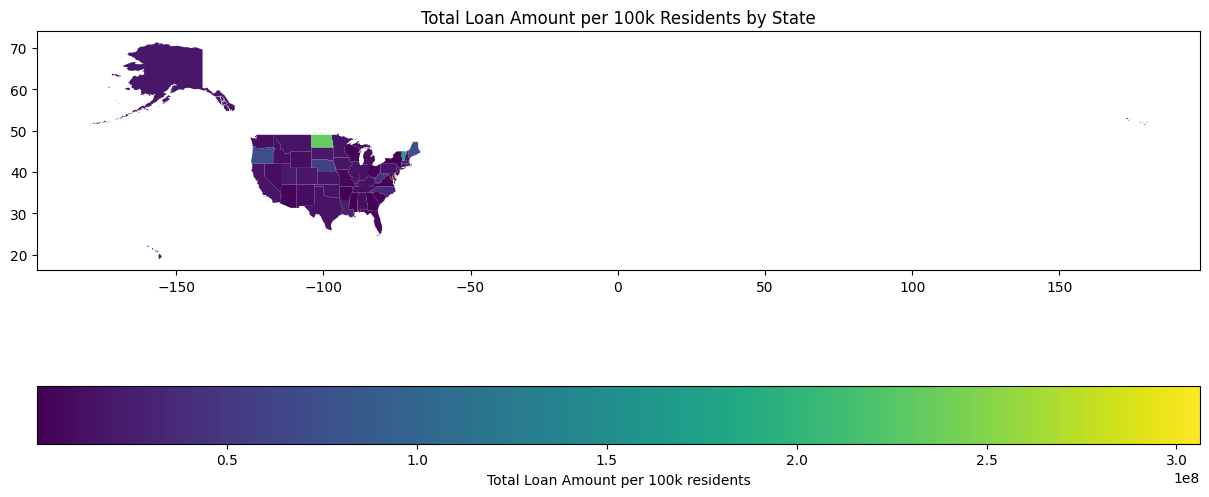

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Provided data
loan_data = {
    'Loan_per_100k': [1.20802732e+07, 1.90315176e+07, 4.64906709e+06, 2.46170029e+04,
                      1.67118099e+07, 1.79786413e+07, 1.74480109e+07, 3.06157246e+08,
                      6.37831352e+06, 1.55203081e+05, 3.27501184e+07, 1.31861760e+07,
                      1.67175019e+07, 1.42090226e+07, 1.44747750e+07, 1.75153185e+07,
                      1.55242169e+07, 2.80676639e+07, 7.27233431e+07, 3.48127665e+06,
                      2.18310883e+07, 1.09342220e+07, 1.62047532e+07, 1.56502820e+05,
                      5.22762002e+06, 1.62028388e+07, 5.91266502e+07, 9.83404478e+06,
                      1.77161343e+07, 1.82567920e+07, 1.02708567e+07, 2.02821916e+06,
                      3.56013287e+07, 2.32655254e+08, 4.59950666e+06, 1.63385646e+07,
                      7.31283824e+07, 1.62344142e+07, 1.60989325e+07, 3.51676830e+06,
                      1.83925453e+07, 1.26378026e+07, 1.60307099e+07, 2.11850864e+07,
                      1.72369505e+08, 7.06304633e+04, 1.17211245e+07, 4.06573873e+07,
                      1.73176328e+06, 1.16679499e+07],
    'STNAME': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
               'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
               'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
               'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
               'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
               'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
               'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
               'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
               'West Virginia', 'Wisconsin', 'Wyoming']
}

df = pd.DataFrame(loan_data)

# Convert state names to uppercase for matching
df['STNAME'] = df['STNAME'].str.upper()

# Load a detailed shapefile of US states
gdf = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Convert state names to uppercase for matching
gdf['NAME'] = gdf['NAME'].str.upper()

# Merge the data with the GeoDataFrame
merged_gdf = gdf.merge(df, left_on='NAME', right_on='STNAME', how='left')

# Check for NaN values or any issues
print("\nGeoDataFrame after merge (with NaN values check):")
print(merged_gdf[['NAME', 'Loan_per_100k']].head(10))
print(merged_gdf[['NAME', 'Loan_per_100k']].isna().sum())

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='Loan_per_100k', ax=ax, legend=True,
                legend_kwds={'label': "Total Loan Amount per 100k residents",
                             'orientation': "horizontal"})
plt.title('Total Loan Amount per 100k Residents by State')
plt.show()

The plot titled "Total Loan Amount per 100k Residents by State" visually represents the distribution of loan amounts per 100,000 residents across the United States. The map uses a color gradient to indicate the loan amount, with the legend at the bottom providing a scale from lower to higher values.

The color scale ranges from purple to green, with darker purple indicating lower loan amounts per 100,000 residents and brighter green representing higher loan amounts.

This visualization helps identify regional variations in loan distributions, highlighting areas with significant loan amounts per capita.